# CodeTreatment
## Load Libraries and select dataframe

In [1]:
# import libraries
import pandas as pd # for working with dataframes
from pandas import DataFrame
import numpy as np # for arrays
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # requires pandas and matplotlib, offers more visualization options
from sklearn.decomposition import PCA # PCA tool
# Import Data
df = pd.read_csv('c:/LabFiles/d206/medical_raw_data.csv', index_col=0) # path to load csv. don't need index column

## Load and Treat data
### Methods used
#### dataframe['Column'].`fillna`(dataframe['Column'].`median`(), inplace=True)
#### dataframe['Column'].`fillna`(dataframe['Column'].`mean`(), inplace=True)
#### dataframe['Column'].`fillna`(pd.`Series`(`np.random.choice`(['Yes', 'No'], size=len(df), p=[1/ratio, 1-1/ratio])), inplace=True)
#### `.replace()`

In [2]:
## PRE-Treatment Check
# Values for Anxiety and Overweight
print(f"Values in Anxiety {df['Anxiety'].unique()}")
print(f"Values in Overweight {df['Overweight'].unique()}")

## PRE-Treatment - NULLs Before - Detection Code seperate
print('===NULLs Before Imputation===')
null_counts = df.isnull().sum()
null_variables = null_counts[null_counts > 0]
print(null_variables)
# impute NULLs in children
df['Children'].fillna(df['Children'].median(), inplace=True)
# impute age# imputation step
df['Age'].fillna(df['Age'].mean(), inplace=True)
# impute NULLs in income
df['Income'].fillna(df['Income'].median(), inplace=True)
# Impute NULLs in Initial_days
df['Initial_days'].fillna(df['Initial_days'].median(), inplace=True)
# Get ratio of Yes/No in Soft_drink
Soft_drink_counts = df['Soft_drink'].value_counts()
Soft_drink_ratio = Soft_drink_counts['No'] / Soft_drink_counts['Yes']
# Impute NULLs in Soft_drink with the specified ratio
df['Soft_drink'].fillna(pd.Series(np.random.choice(['Yes', 'No'], size=len(df), p=[1/Soft_drink_ratio, 1-1/Soft_drink_ratio])), inplace=True)
# Reencode Overweight inplace
df['Overweight'] = df['Overweight'].replace({0: 'No', 1: 'Yes'})
# Get ratio of 1s/0s in Overweight
overweight_counts = df['Overweight'].value_counts()
overweight_ratio = overweight_counts['Yes'] / overweight_counts['No']
# Impute NULLs in Overweight
df['Overweight'].fillna(pd.Series(np.random.choice(['No', 'Yes'], size=len(df), p=[1/overweight_ratio, 1-1/overweight_ratio])), inplace=True)
# Reencode Anxiety inplace
df['Anxiety'] = df['Anxiety'].replace({0: 'No', 1: 'Yes'})
# Get ratio of 1s/0s in Anxiety
anxiety_counts = df['Anxiety'].value_counts()
anxiety_ratio = anxiety_counts['No'] / anxiety_counts['Yes']
# Impute NULLs in Anxiety
df['Anxiety'].fillna(pd.Series(np.random.choice(['Yes', 'No'], size=len(df), p=[1/anxiety_ratio, 1-1/anxiety_ratio])), inplace=True)
# Validate
print('===NULLs after imputation===')
imp_null_counts = df.isnull().sum()
imp_null_variables = imp_null_counts[null_counts > 0]
print(imp_null_variables)
# Check new columns
# Values for Anxiety and Overweight
print(f"Values in Anxiety column {df['Anxiety'].unique()}")
print(f"Values in Overweight column {df['Overweight'].unique()}")

Values in Anxiety [ 1. nan  0.]
Values in Overweight [ 0.  1. nan]
===NULLs Before Imputation===
Children        2588
Age             2414
Income          2464
Soft_drink      2467
Overweight       982
Anxiety          984
Initial_days    1056
dtype: int64
===NULLs after imputation===
Children        0
Age             0
Income          0
Soft_drink      0
Overweight      0
Anxiety         0
Initial_days    0
dtype: int64
Values in Anxiety column ['Yes' 'No']
Values in Overweight column ['No' 'Yes']


Checking with Boxplots
Outliers for Children: 457
Outliers for Age: 0
Outliers for Income: 705
Outliers for Initial_days: 0


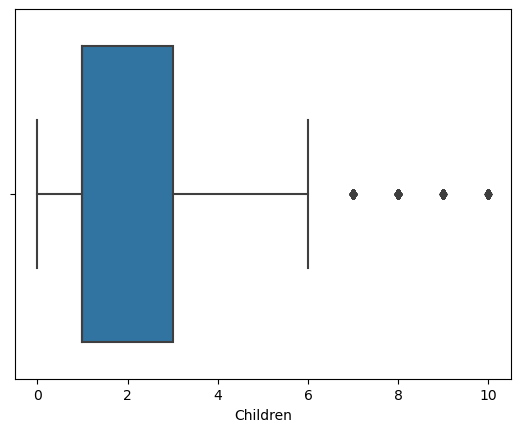

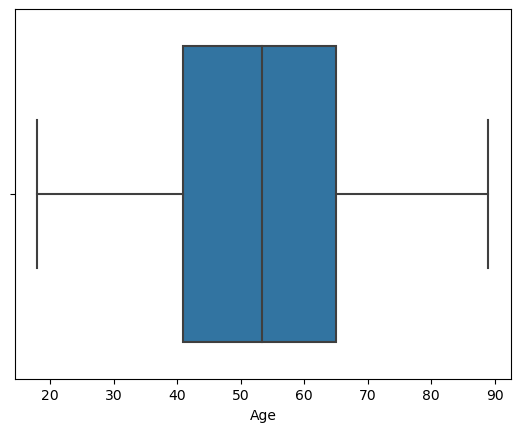

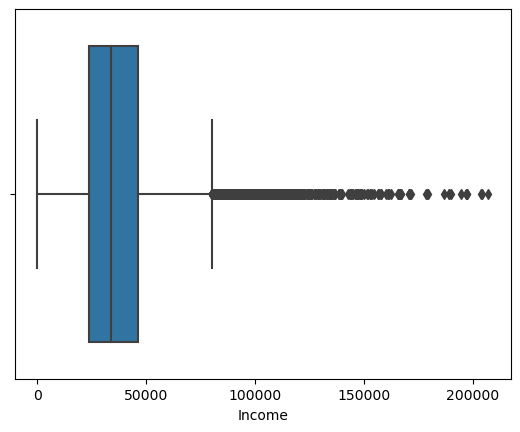

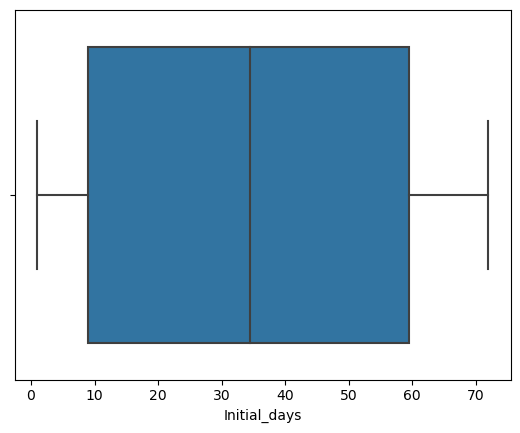

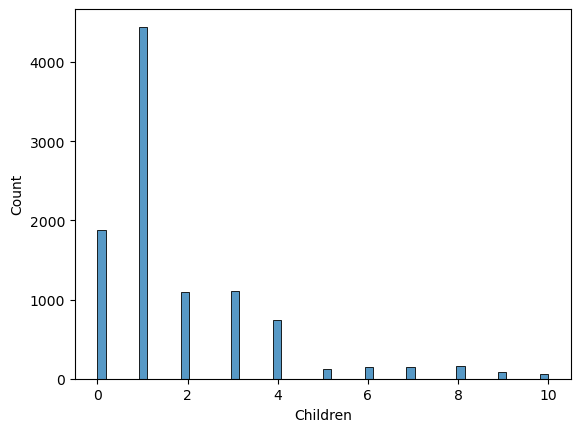

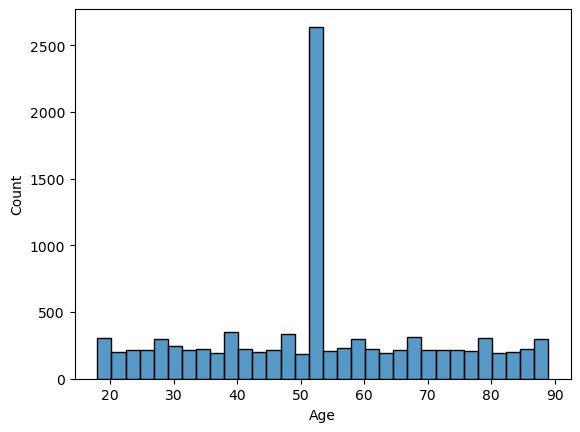

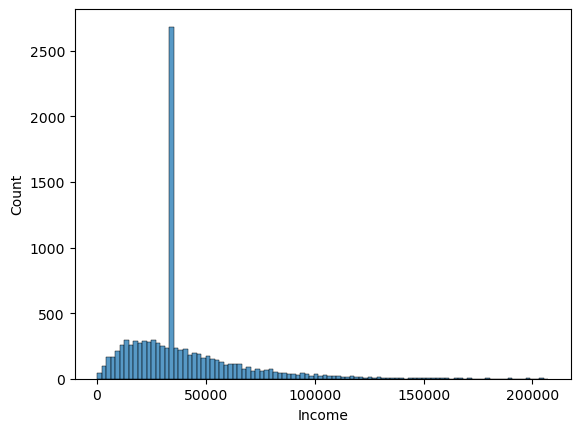

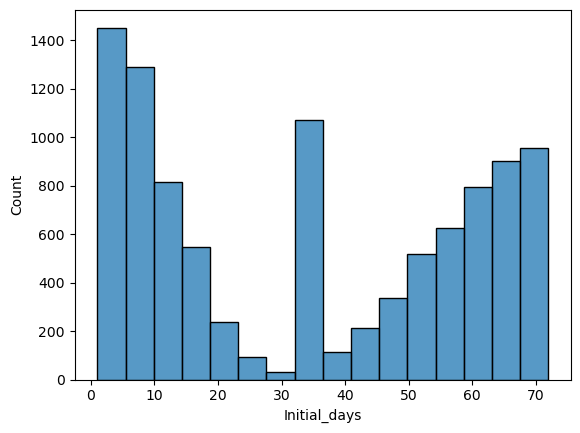

In [3]:
# Boxplots
print('Checking with Boxplots')
# filter on only int64 and float64 datatype
int_float_cols = [col for col in df.columns if df[col].dtype in ('int64', 'float64')]

# create check_outliers. The columns we do want 'Children', 'Age', 'Income', 'Soft_drink', 'Initial_days'
check_outliers = [col for col in int_float_cols if col in ('Children', 'Age', 'Income', 'Initial_days')]

# # Create a figure for each column
for col in check_outliers:
    plt.figure()
    sns.boxplot(x=df[col], data=df)
    
    # Get the lower and upper whiskers for the column
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html
    q1 = df[col].quantile(q=0.25)
    q3 = df[col].quantile(q=0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    
    # Get the outliers for the column
    outliers = df[(df[col] < lower_whisker) | (df[col] > upper_whisker)][col]
    
    # Print the outliers for the column
    print(f"Outliers for {col}: {outliers.count()}")
# Create histograms for each column
# https://seaborn.pydata.org/generated/seaborn.histplot.html
for col in check_outliers:
    plt.figure()
    sns.histplot(x=df[col], data=df)

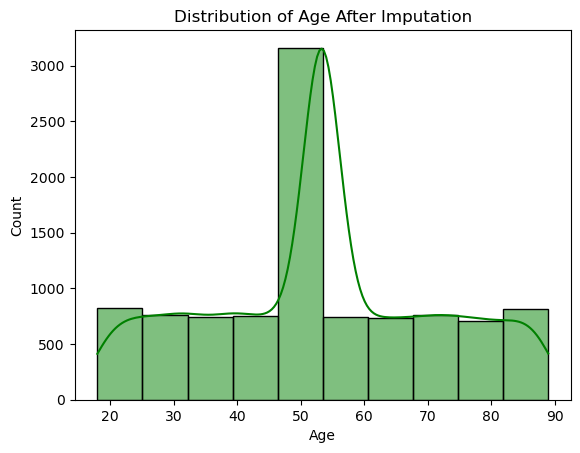

In [7]:
sns.histplot(data=df, x='Age', bins=10, color='green', kde=True)
plt.title('Distribution of Age After Imputation')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

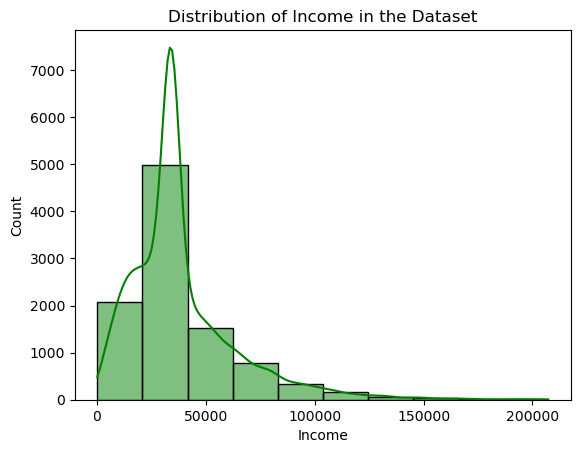

In [5]:
sns.histplot(data=df, x='Income', bins=10, color='green', kde=True)
plt.title('Distribution of Income in the Dataset')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

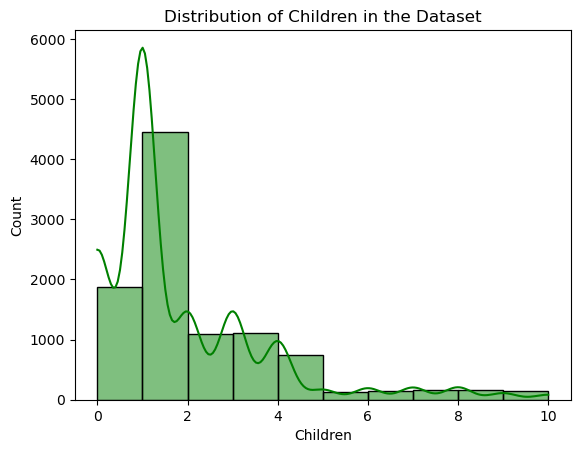

In [6]:
sns.histplot(data=df, x='Children', bins=10, color='green', kde=True)
plt.title('Distribution of Children in the Dataset')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()

# Export Cleaned Data as csv

In [104]:
# export as csv
df.to_csv(r'c:/LabFiles/illovsky_d206_cleaned_data.csv', index=False) # path to cleaned csv. Index column not needed

# PCA CODE - Not part of Data Cleaning

In [111]:
# PCA
## 1. Import Libraries
## 2. Define your features/variables
test_pca = df[['Initial_days', 'Lat', 'Lng', 'Full_meals_eaten', 'TotalCharge', 'Income', 'VitD_levels', 'VitD_supp', 'Additional_charges', 'Age', 'Children', 'Doc_visits']]
## 3. Normalize
test_pca_normalized = (test_pca - test_pca.mean())/test_pca.std()
pca = PCA(n_components=test_pca.shape[1]) #PCA
pca.fit(test_pca_normalized) #fit

PCA(n_components=12)

In [112]:
## print cumulative sum and explained variance ratio
# cumsum
print(f"cumulative sum \n {pca.explained_variance_ratio_.cumsum()} <==how much can be explained in total")
# Principal component explained variance ratio
print(f"explained_variance_ratio_ \n {pca.explained_variance_ratio_} <==how much each component contributes")

cumulative sum 
 [0.16260626 0.29750936 0.39039455 0.47673957 0.56194924 0.64572512
 0.7278688  0.80953439 0.89043219 0.96402799 0.99553605 1.        ] <==how much can be explained in total
explained_variance_ratio_ 
 [0.16260626 0.1349031  0.09288519 0.08634503 0.08520966 0.08377588
 0.08214368 0.08166559 0.0808978  0.0735958  0.03150806 0.00446395] <==how much each component contributes


In [113]:
# transform back into dataframe
test_pca2 = pd.DataFrame(pca.transform(test_pca_normalized), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'P11', 'PC12'])
# 4. PCA Loadings
loadings = pd.DataFrame(pca.components_.T,
                        columns = ['PC1', 'PC2', 'PC3', 'PC4 ', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'P11', 'PC12'],
                        index = test_pca_normalized.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,P11,PC12
Initial_days,0.446265,-0.073928,-0.003149,-0.383817,-0.308633,0.096944,-0.126416,-0.528869,0.194648,-0.078895,-0.005965,0.451190
Lat,-0.016199,-0.016410,0.697905,-0.023309,-0.024345,-0.138748,-0.037001,0.075460,-0.072923,-0.692485,-0.009639,-0.000136
Lng,-0.005264,0.017349,-0.701582,0.061994,0.000744,-0.047382,-0.072054,0.093197,0.075188,-0.694049,0.011224,0.001983
Full_meals_eaten,-0.008605,0.035097,0.111551,0.573227,0.158976,0.265977,0.273620,-0.297033,0.626257,-0.079197,-0.008723,-0.001375
TotalCharge,0.702136,-0.079764,0.003408,0.017790,0.002972,0.001360,-0.011881,-0.011979,-0.007388,-0.012121,0.020940,-0.706667
Income,-0.006539,-0.005009,-0.037565,-0.221178,0.629068,0.345498,0.321436,-0.362645,-0.426481,-0.133162,-0.007398,-0.001104
VitD_levels,0.540420,-0.054417,0.009180,0.339917,0.261430,-0.074189,0.090708,0.423878,-0.168357,0.051415,-0.022946,0.544144
VitD_supp,0.033743,0.010986,0.001353,-0.559644,0.167632,-0.166802,0.516461,0.357406,0.484837,0.007043,-0.004971,-0.001490
Additional_charges,0.084494,0.701172,0.024888,-0.013501,-0.004930,-0.001574,-0.002437,-0.007337,-0.020916,-0.000873,0.706556,0.025901
Age,0.084046,0.700941,0.001876,-0.017230,-0.024465,-0.013278,-0.006618,-0.016465,-0.025822,-0.001467,-0.706604,-0.016417


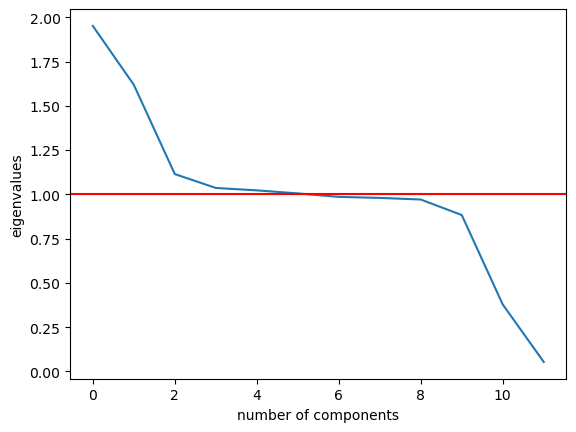

In [114]:
covariance_matrix = np.dot(test_pca_normalized.T, test_pca_normalized)/ test_pca.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(covariance_matrix, eigenvector)) for eigenvector in pca.components_]
# plot
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalues')
plt.axhline(y=1, color='red')
plt.show() 